In [2]:
!pip install darts
import pandas as pd
from darts import TimeSeries
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.6/200.6 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 86.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.0/340.0 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:0

In [3]:
df = pd.read_csv("/kaggle/input/datacarsalegaikindo2021-2025/dataCarSale2021-2025.csv")
print(df.head())
df.info()

        waktu  DAIHATSU    HONDA  MITSUBISHI  SUZUKI   TOYOTA
0  2021-01-01    8993.0   7231.0      9108.0  6400.0  15474.0
1  2021-02-01    9412.0   6812.0      7567.0  4600.0  14645.0
2  2021-03-01   16770.0  11350.0     13088.0  8669.0  26034.0
3  2021-04-01   15861.0   8474.0     13820.0  8100.0  22618.0
4  2021-05-01    8310.0   5832.0     10160.0  5341.0  17361.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   waktu       54 non-null     object 
 1   DAIHATSU    54 non-null     float64
 2   HONDA       54 non-null     float64
 3   MITSUBISHI  54 non-null     float64
 4   SUZUKI      54 non-null     float64
 5   TOYOTA      54 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.7+ KB


In [4]:
df['waktu'] = pd.to_datetime(df['waktu'])
df.set_index('waktu', inplace = True)

full_date = pd.date_range(start = df.index.min(), end = df.index.max(), freq="MS")
df = df.reindex(full_date)

df = df.interpolate(method = "linear")
df.head(60)

,DAIHATSU,HONDA,MITSUBISHI,SUZUKI,TOYOTA
2021-01-01,8993.000,7231.0000,9108.0000,6400.000,15474.0000
2021-02-01,9412.000,6812.0000,7567.0000,4600.000,14645.0000
2021-03-01,16770.000,11350.0000,13088.0000,8669.000,26034.0000
2021-04-01,15861.000,8474.0000,13820.0000,8100.000,22618.0000
2021-05-01,8310.000,5832.0000,10160.0000,5341.000,17361.0000
2021-06-01,15481.000,8782.0000,8277.0000,8965.000,22310.0000
2021-07-01,9284.000,9030.0000,13453.0000,6274.000,20950.0000
2021-08-01,14408.000,7337.0000,13720.0000,10021.000,28418.0000
2021-09-01,17529.000,3453.0000,12200.0000,7515.000,32596.0000
2021-10-01,17020.000,5861.0000,13109.0000,7624.000,20633.0000


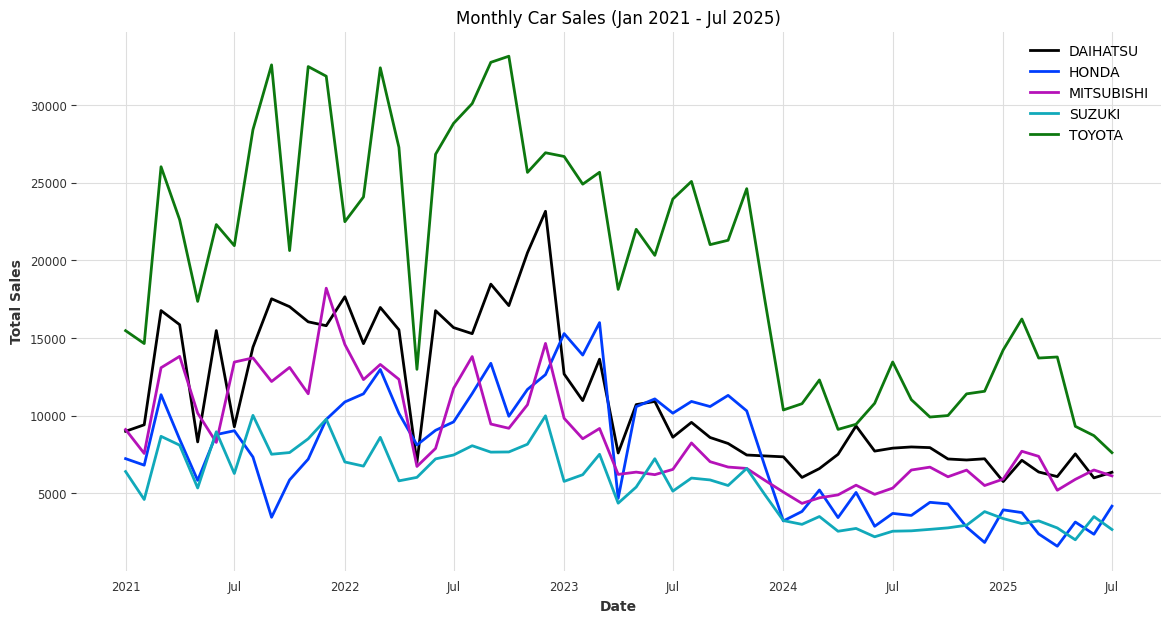

In [5]:
series = TimeSeries.from_dataframe(df, freq='MS')

plt.figure(figsize=(14, 7))
series.plot()
plt.title('Monthly Car Sales (Jan 2021 - Jul 2025)')
plt.ylabel('Total Sales')
plt.xlabel('Date')
plt.grid(True)
plt.show()

In [6]:
train, val = series.split_before(pd.Timestamp('20240801'))

In [7]:
from darts.utils.timeseries_generation import datetime_attribute_timeseries

covariates = datetime_attribute_timeseries(
    series,
    attribute="month",
    one_hot=False
)
covariates = covariates.stack(
    datetime_attribute_timeseries(series, attribute="year", one_hot=False)
)

from darts.dataprocessing.transformers import Scaler
scaler_covs = Scaler()
covariates = scaler_covs.fit_transform(covariates)

print("--- Covariates (Features) Created Successfully ---")
print("First 5 rows of our new features:")
print(covariates.to_dataframe().head())

--- Covariates (Features) Created Successfully ---
First 5 rows of our new features:
               month  year
2021-01-01  0.000000   0.0
2021-02-01  0.090909   0.0
2021-03-01  0.181818   0.0
2021-04-01  0.272727   0.0
2021-05-01  0.363636   0.0


Training the Transformer model... (This will take some time)


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Training: |          | 0/? [00:00<?, ?it/s]

Model training complete!

Generating forecast for the validation period...


Predicting: |          | 0/? [00:00<?, ?it/s]


SMAPE Score for Transformer Model: 23.94%


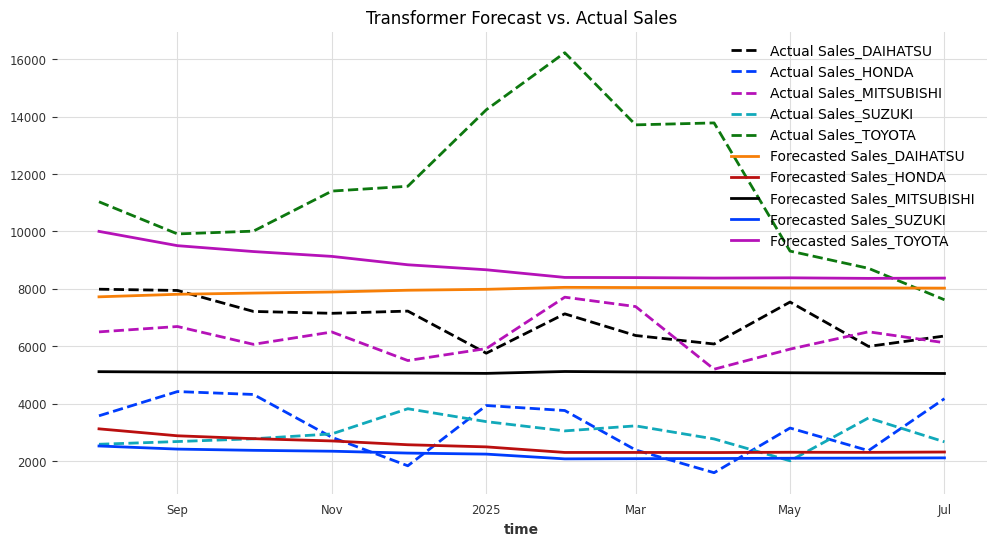

In [8]:
from darts.models import TransformerModel
from darts.dataprocessing.transformers import Scaler
from darts.metrics import smape

# 1. Scale the main sales data (important for the model)
scaler_target = Scaler()
series_scaled = scaler_target.fit_transform(train) # Fit the scaler ONLY on the training data

# 2. Initialize the Transformer Model
# These parameters are a good starting point.
transformer_model = TransformerModel(
    input_chunk_length=12,
    output_chunk_length=1,
    n_epochs=100, # Number of training cycles. Increase for better results if needed.
    random_state=42,
)

# 3. Train the model
print("Training the Transformer model... (This will take some time)")
transformer_model.fit(
    series_scaled, # Train on the scaled sales data
    past_covariates=covariates # Use the features we just created
)
print("Model training complete!")

# 4. Generate a forecast on the validation set
print("\nGenerating forecast for the validation period...")
prediction_scaled = transformer_model.predict(
    n=len(val),
    past_covariates=covariates # Provide the features for the forecast period
)

# 5. IMPORTANT: Inverse transform the prediction to get real sales values
prediction_transformer = scaler_target.inverse_transform(prediction_scaled)

# 6. Evaluate with SMAPE
smape_score_transformer = smape(val, prediction_transformer)
print(f"\nSMAPE Score for Transformer Model: {smape_score_transformer:.2f}%")

# 7. Plot the forecast
plt.figure(figsize=(12, 6))
val.plot(label='Actual Sales', linestyle="--")
prediction_transformer.plot(label='Forecasted Sales')
plt.title('Transformer Forecast vs. Actual Sales')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# This code should be run after you have already generated
# your 'val' and 'prediction_transformer' TimeSeries objects.

import pandas as pd
from darts.metrics import smape

# Create an empty dictionary to store the results
brand_smape_scores = {}

# We iterate through each column name (component) in your validation TimeSeries.
# Each component corresponds to a specific brand.
for brand_column in val.components:
    
    # Extract the time series for just one brand from the actuals
    actual_series_for_brand = val[brand_column]
    
    # Extract the corresponding time series for the same brand from the forecast
    forecast_series_for_brand = prediction_transformer[brand_column]
    
    # Calculate the SMAPE score for this single brand
    score = smape(actual_series_for_brand, forecast_series_for_brand)
    
    # Store the result with the brand's name as the key
    brand_smape_scores[brand_column] = score

# --- Displaying the results in a clean, sorted table ---

# Convert the dictionary to a pandas Series for easy viewing and sorting
smape_series = pd.Series(brand_smape_scores, name="SMAPE Score")
smape_series.index.name = "Brand"

# Sort the results to easily see the best and worst performing forecasts
sorted_scores = smape_series.sort_values(ascending=True)

print("--- SMAPE Score for Each Brand ---")
# Print the scores, formatted nicely as percentages
print(sorted_scores.to_string(float_format="%.2f%%"))

--- SMAPE Score for Each Brand ---
Brand
DAIHATSU     15.60%
MITSUBISHI   21.25%
TOYOTA       25.31%
SUZUKI       27.45%
HONDA        30.10%


In [10]:
# scaler_target = Scaler()
# series_scaled = scaler_target.fit_transform(train)
# print("Sales data scaled.\n")


# # === Step 6: Define and Train the Tuned Transformer Model ===
# print("--- Initializing Tuned Transformer Model ---")
# # We remove EarlyStopping as our validation set is too short for the lookback window.
# # We will train for a fixed number of epochs.
# final_transformer = TransformerModel(
#     input_chunk_length=24,
#     output_chunk_length=12, # Model will predict 12 months at a time
#     d_model=64,
#     nhead=4,
#     n_epochs=200,          # Train for 200 cycles (a tunable parameter)
#     random_state=42,
# )

# print("--- Training the Model (this may take several minutes) ---")
# # **CRUCIAL FIX**: We do NOT pass the validation set into the fit() method.
# final_transformer.fit(
#     series=series_scaled,
#     past_covariates=scaled_covariates
# )
# print("Model training complete!\n")


# # === Step 7: Generate Forecast and Evaluate ===
# print("--- Generating and Evaluating Forecast ---")
# # Predict the validation period
# prediction_tuned = final_transformer.predict(
#     n=len(val),
#     series=series_scaled,
#     past_covariates=scaled_covariates
# )

# # Convert the scaled prediction back to original sales figures
# prediction_final = scaler_target.inverse_transform(prediction_tuned)

# # Calculate the SMAPE score
# smape_score_final = smape(val, prediction_final)
# print(f"SMAPE Score for Final Transformer Model: {smape_score_final:.2f}%\n")


# # === Step 8: Visualize the Results ===
# print("--- Plotting Results ---")
# plt.figure(figsize=(12, 6))
# val.plot(label='Actual Sales')
# prediction_final.plot(label='Forecasted Sales')
# plt.title('Final Transformer Forecast vs. Actual Sales')
# plt.legend()
# plt.grid(True)
# plt.show()